In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("/root/data/smartwatch/subjects/valid_files.txt") as f:
    valid_files = f.readlines()
    valid_files = [x.strip() for x in valid_files]

In [21]:
data_dir = "/root/data/smartwatch/subjects"
subject = valid_files[2]

df_imu = pd.read_csv(data_dir + f"/S01/{subject}_imu.csv")

# Rename sensors
df_imu.loc[df_imu[" Sensor Type"] == 1, " Sensor Type"] = "Accelerometer"
df_imu.loc[df_imu[" Sensor Type"] == 2, " Sensor Type"] = "Magnetometer"
df_imu.loc[df_imu[" Sensor Type"] == 4, " Sensor Type"] = "Gyroscope"
df_imu

,Sample Time [s],Sensor Type,val1,val2,val3
0,0.000000,Accelerometer,7.867188,-4.839844,6.875000
1,0.010224,Accelerometer,7.781250,-4.851562,6.808594
2,0.020185,Accelerometer,7.730469,-4.953125,6.824219
3,0.030409,Accelerometer,7.667969,-4.996094,6.765625
4,0.040370,Accelerometer,7.671875,-4.917969,6.671875
...,...,...,...,...,...
11896,40.213413,Magnetometer,-31.125000,0.899902,-44.875000
11897,40.215250,Gyroscope,-0.838379,-1.767578,0.060638
11898,40.147617,Accelerometer,4.980469,-4.667969,11.015625
11899,40.223637,Magnetometer,-32.156250,2.699219,-44.281250


In [22]:
df_imu["Sample Time [s]"]

0         0.000000
1         0.010224
2         0.020185
3         0.030409
4         0.040370
           ...    
11896    40.213413
11897    40.215250
11898    40.147617
11899    40.223637
11900    40.225212
Name: Sample Time [s], Length: 11901, dtype: float64

In [23]:
df_imu.columns

Index(['Sample Time [s]', ' Sensor Type', 'val1', 'val2', 'val3'], dtype='object')

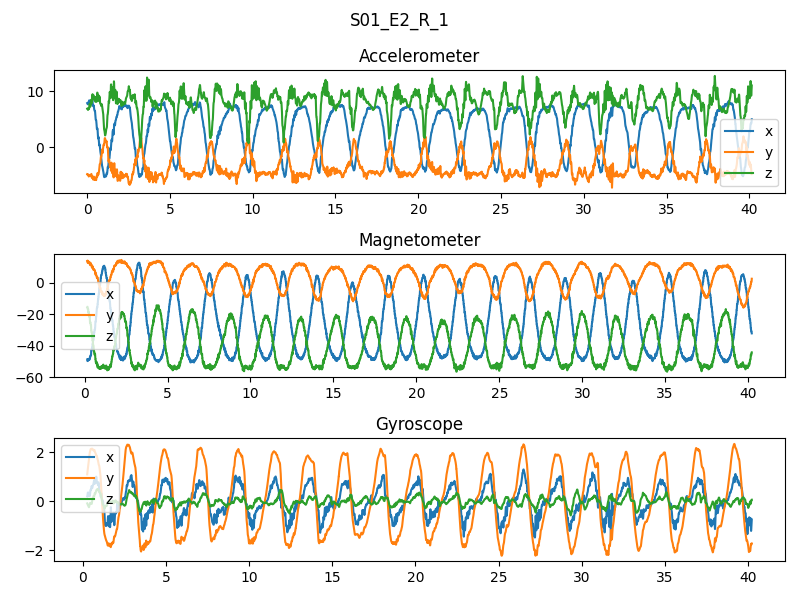

In [34]:
fig, axs = plt.subplots(3, 1, figsize=(8, 6))
for ax, sensor_type in zip(axs, df_imu[" Sensor Type"].unique()):
    subdf = df_imu.loc[df_imu[" Sensor Type"] == sensor_type, :]
    t = subdf["Sample Time [s]"].values
    x = subdf["val1"].values
    y = subdf["val2"].values
    z = subdf["val3"].values
    ax.plot(t, x, label="x")
    ax.plot(t, y, label="y")
    ax.plot(t, z, label="z")
    ax.set_title(sensor_type)
    ax.legend()
plt.suptitle(subject)
plt.tight_layout()
plt.show()

In [25]:
df_mocap = pd.read_csv(data_dir + f"/S01/{subject}_mocap.csv", skiprows=2)
df_mocap

,Unnamed: 0,Unnamed: 1,S01_cal:C7,Unnamed: 3,Unnamed: 4,S01_cal:L5,Unnamed: 6,Unnamed: 7,S01_cal:SS,Unnamed: 9,...,S01_cal:L_FA3,Unnamed: 93,Unnamed: 94,S01_cal:L_MCP5,Unnamed: 96,Unnamed: 97,S01_cal:L_MCP2,Unnamed: 99,Unnamed: 100,Unnamed: 101
0,Frame,Sub Frame,X,Y,Z,X,Y,Z,X,Y,...,X,Y,Z,X,Y,Z,X,Y,Z,NaN
1,NaN,NaN,mm,mm,mm,mm,mm,mm,mm,mm,...,mm,mm,mm,mm,mm,mm,mm,mm,mm,NaN
2,1,0,786.807,248.755,1481.84,855.211,287.019,1019.94,649.115,224.464,...,964.891,-34.0731,931.151,974.99,-57.6467,777.005,889.742,-34.1957,779.704,NaN
3,2,0,786.828,248.91,1481.87,855.317,286.834,1019.89,649.155,224.62,...,964.897,-33.7137,931.133,974.937,-57.2435,777.031,889.672,-33.8417,779.76,NaN
4,3,0,786.88,249.025,1481.88,855.428,286.677,1019.91,649.223,224.806,...,964.54,-33.3331,931.029,974.459,-56.8342,776.87,889.202,-33.4329,779.66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,4006,0,782.658,187.186,1470.33,872.749,262.506,1019.35,651.569,237.898,...,397.389,109.842,960.546,299.092,154.941,855.372,255.079,184.015,925.818,NaN
4008,4007,0,782.386,187.825,1470.55,872.755,262.546,1019.43,651.158,237.608,...,406.088,106.348,954.683,309.534,150.394,847.344,264.117,179.806,916.813,NaN
4009,4008,0,782.124,188.492,1470.78,872.787,262.621,1019.48,650.809,237.277,...,414.902,102.808,948.986,320.193,145.736,839.641,273.347,175.522,907.937,NaN
4010,4009,0,782.177,189.266,1471.03,872.765,262.655,1019.53,650.417,236.97,...,423.73,99.2621,943.489,331.066,141.309,832.02,282.719,171.333,899.189,NaN


We care about markers on the radial styloid (RS) and ulnar styloid (US) on the wrist of the right arm.

For orientation:
- X represents "forward"
- Y represents "up"
- Z represents "right"

In [26]:
i = df_mocap.columns.tolist().index("S01_cal:R_US")
us_inds = [i, i+1, i+2]

i = df_mocap.columns.tolist().index("S01_cal:R_RS") 
rs_inds = [i, i+1, i+2]

In [27]:
df_rs = df_mocap.iloc[2:, rs_inds]
df_rs.columns = [f"R_RS_{pos}" for pos in "XYZ"]
df_rs = df_rs.astype(float)
df_rs

,R_RS_X,R_RS_Y,R_RS_Z
2,391.959,214.845,964.939
3,391.782,214.934,965.027
4,391.322,215.122,965.243
5,390.665,215.418,965.570
6,389.740,215.774,966.024
...,...,...,...
4007,228.833,402.357,1457.820
4008,227.076,402.007,1446.920
4009,225.494,401.526,1435.900
4010,224.072,400.947,1424.740


In [28]:
df_us = df_mocap.iloc[2:, us_inds]
df_us.columns = [f"R_US_{pos}" for pos in "XYZ"]
df_us = df_us.astype(float)
df_us

,R_US_X,R_US_Y,R_US_Z
2,381.299,263.313,936.094
3,381.132,263.387,936.160
4,380.747,263.582,936.392
5,380.083,263.858,936.739
6,379.169,264.267,937.216
...,...,...,...
4007,221.299,459.917,1455.200
4008,219.459,459.484,1443.810
4009,217.863,459.010,1432.310
4010,216.408,458.363,1420.720


In [29]:
len(df_rs)

4010

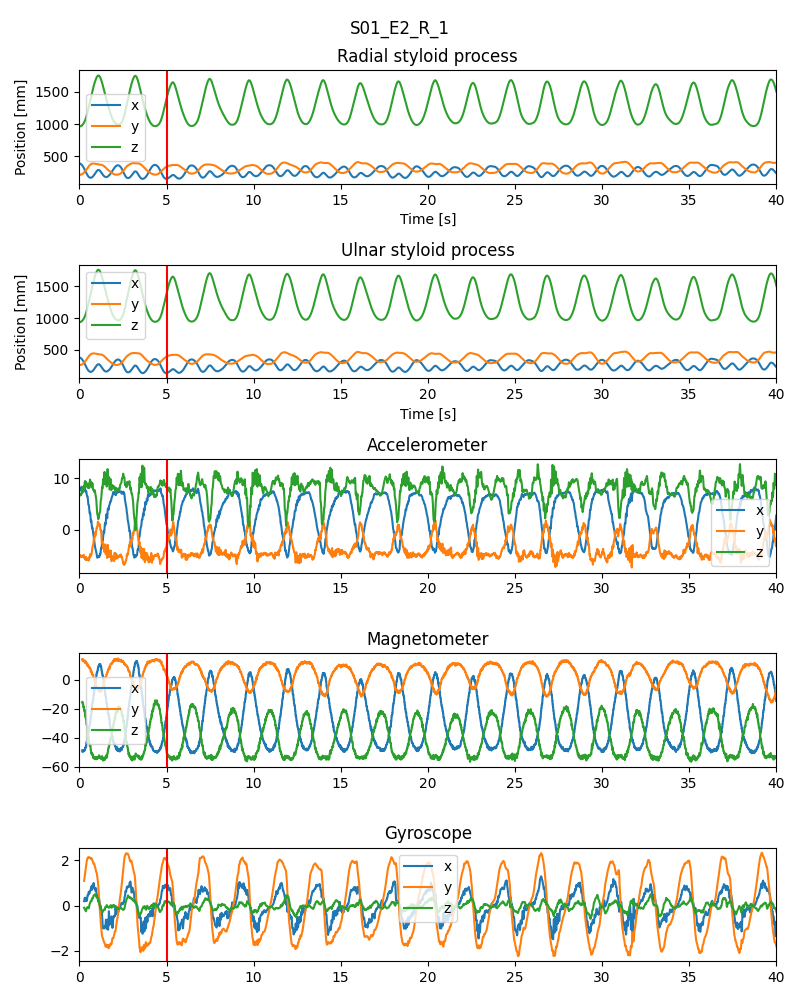

In [31]:
fig, axs = plt.subplots(5, 1, figsize=(8, 10))
for ax, df, label in zip(axs[:2], [df_rs, df_us], ["Radial styloid process", "Ulnar styloid process"]):
    N = len(df_rs)
    t = np.arange(N) / 100  # Data is taken at 50 Hz
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    z = df.iloc[:, 2]
    ax.plot(t, x, label="x")
    ax.plot(t, y, label="y")
    ax.plot(t, z, label="z")
    ax.set_title(label)
    ax.axvline(5, c="r")
    ax.set_xlim(0, 40)
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Position [mm]")
    ax.legend()

for ax, sensor_type in zip(axs[2:], df_imu[" Sensor Type"].unique()):
    subdf = df_imu.loc[df_imu[" Sensor Type"] == sensor_type, :]
    t = subdf["Sample Time [s]"].values
    x = subdf["val1"].values
    y = subdf["val2"].values
    z = subdf["val3"].values
    ax.plot(t, x, label="x")
    ax.plot(t, y, label="y")
    ax.plot(t, z, label="z")
    ax.axvline(5, c="r")
    ax.set_xlim(0, 40)
    ax.set_title(sensor_type)
    ax.legend()
plt.suptitle(subject)
plt.tight_layout()
plt.show()

In [13]:
%matplotlib widget

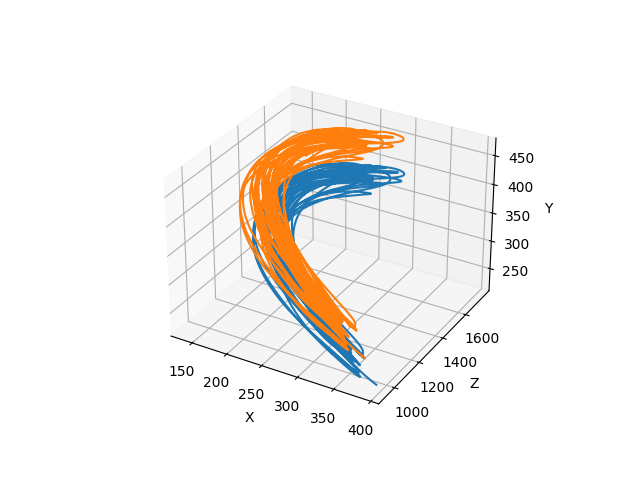

In [32]:
ax = plt.figure().add_subplot(projection='3d')

for df, label in zip([df_rs, df_us], ["Radial styloid process", "Ulnar styloid process"]):
    x, y, z = zip(*df.values.tolist())
    ax.plot(x, z, zs=y, label=label)
ax.set_xlabel("X")
ax.set_ylabel("Z")
ax.set_zlabel("Y")
plt.show()

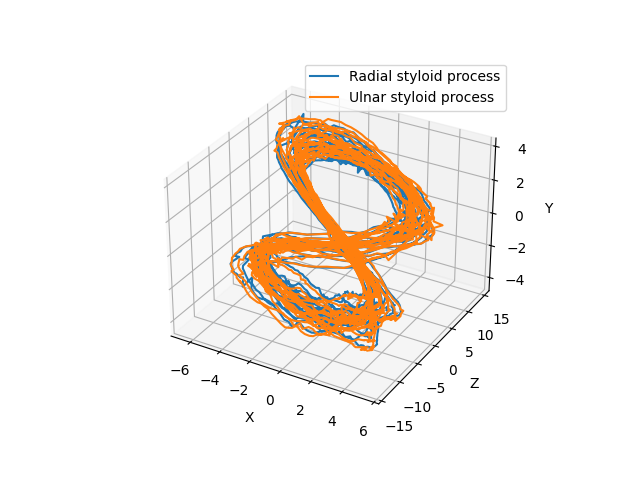

In [33]:
ax = plt.figure().add_subplot(projection='3d')

for df, label in zip([df_rs, df_us], ["Radial styloid process", "Ulnar styloid process"]):
    x, y, z = zip(*df.values.tolist())
    x, y, z = map(np.diff, (x, y, z))
    ax.plot(x, z, zs=y, label=label)
ax.set_xlabel("X")
ax.set_ylabel("Z")
ax.set_zlabel("Y")
plt.legend()
plt.show()